In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv(r"D:\project\diabetes.csv")

In [3]:
# Step 3: Data exploration
print(df.head())    

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(df.describe())  

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

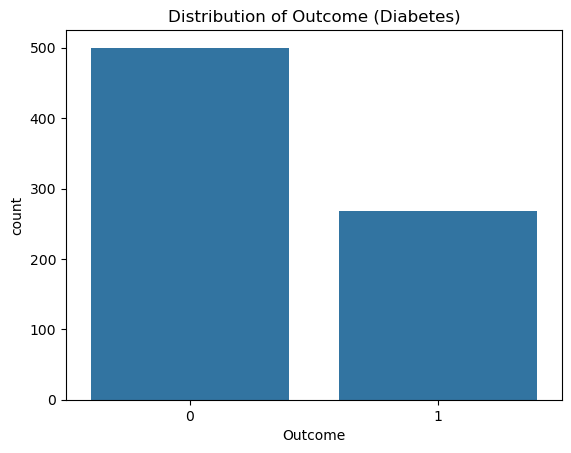

In [6]:
# Step 4: Data Visualization (optional but useful for understanding)
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (Diabetes)')
plt.show()



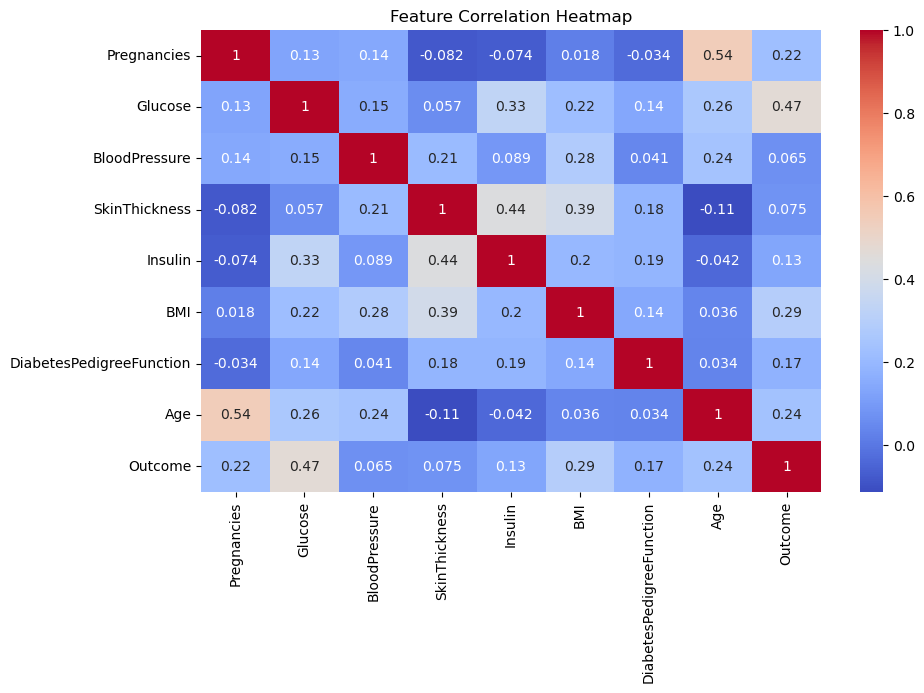

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [8]:
# Step 5: Data Preprocessing
X = df.drop('Outcome', axis=1)  # Features (Input data)
y = df['Outcome']    

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Step 7: Model selection - Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Step 8: Model evaluation
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



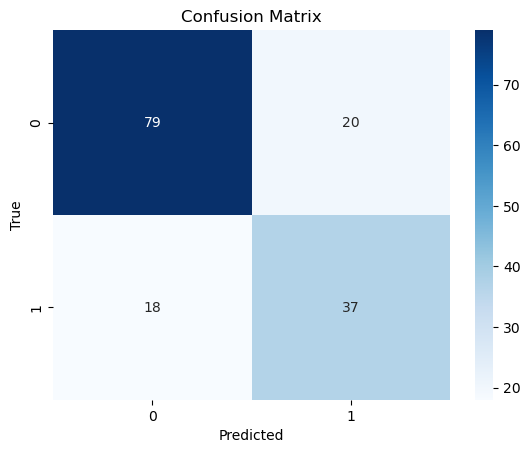

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [14]:
# Step 9: Hyperparameter tuning using GridSearchCV (Optional)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........C=0.1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 2/5] END ...........C=0.1, solver=liblinear;, score=0.805 total time=   0.0s
[CV 3/5] END ...........C=0.1, solver=liblinear;, score=0.732 total time=   0.0s
[CV 4/5] END ...........C=0.1, solver=liblinear;, score=0.732 total time=   0.0s
[CV 5/5] END ...........C=0.1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 1/5] END ................C=0.1, solver=saga;, score=0.740 total time=   0.0s
[CV 2/5] END ................C=0.1, solver=saga;, score=0.805 total time=   0.0s
[CV 3/5] END ................C=0.1, solver=saga;, score=0.740 total time=   0.0s
[CV 4/5] END ................C=0.1, solver=saga;, score=0.740 total time=   0.0s
[CV 5/5] END ................C=0.1, solver=saga;, score=0.795 total time=   0.0s
[CV 1/5] END .............C=1, solver=liblinear;, score=0.748 total time=   0.0s
[CV 2/5] END .............C=1, solver=liblinear;,

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']},
             verbose=3)

In [15]:
# Best parameters from GridSearch
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'solver': 'liblinear'}


In [16]:
# Step 10: Re-evaluate the tuned model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy Score with Best Model:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report with Best Model:\n", classification_report(y_test, y_pred_best))


Accuracy Score with Best Model: 0.7532467532467533

Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [17]:
# Step 11: Save the final model using Joblib
joblib.dump(best_model, 'diabetes_prediction_model.pkl')

['diabetes_prediction_model.pkl']

In [18]:
# Step 12: Load the model and make a prediction (Optional)
loaded_model = joblib.load('diabetes_prediction_model.pkl')
sample_data = np.array([[6,148,72,35,0,33.6,0.627,50]])  # Example patient data
sample_data_scaled = scaler.transform(sample_data)        # Scale the sample data
prediction = loaded_model.predict(sample_data_scaled)


C:\Users\bhart\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:

print(f"The prediction for the sample data is: {'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'}")

The prediction for the sample data is: Diabetic
